In [1]:
import pandas as pd
import numpy as np
import random
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
street_name = ['Центральная','Молодежная','Школьная','Лесная','Садовая',
                'Советская','Новая','Набережная','Заречная','Зеленая',
                'Победы','Ленина','Лазо','Ромашковая','Мятная']

Генерируем данные.

In [3]:
data = pd.DataFrame({'ATM_ID':(np.random.randint(1000,40000,size=1000000) * np.random.rand(1000000) + 1)\
                     .round().astype(int),
                     'ADR0':np.random.randint(0,15,size=1000000),
                     'ADR1':np.random.randint(1,30,size=1000000),
                     'DT_INS0':np.random.normal(0,45, size=1000000)})
data['ADR'] = data['ADR0'].apply(lambda x: street_name[x]) + ', ' + data['ADR1'].apply(str)
data['DT_INS'] = pd.to_datetime('2019.11.15 00:01:00') + data['DT_INS0'].round(2).apply(lambda x: dt.timedelta(x))
data = data.drop(columns=['ADR0','ADR1','DT_INS0']).sort_values(['ATM_ID','ADR','DT_INS'], ignore_index=1)
data

,ATM_ID,ADR,DT_INS
0,1,"Заречная, 16",2019-10-19 21:37:00
1,1,"Заречная, 20",2019-11-22 20:53:48
2,1,"Заречная, 21",2019-11-02 22:05:48
3,1,"Зеленая, 16",2019-10-27 06:58:36
4,1,"Зеленая, 26",2019-11-26 22:05:48
...,...,...,...
999995,39910,"Новая, 14",2019-11-18 14:10:36
999996,39916,"Садовая, 28",2019-09-12 19:13:00
999997,39917,"Садовая, 27",2019-11-11 12:15:24
999998,39919,"Мятная, 23",2019-11-01 21:08:12


Примеры дубликатов

In [4]:
data[data.duplicated(subset=['ATM_ID','ADR'], keep=0)].sort_values(['ATM_ID','ADR','DT_INS']).iloc[100:140,:]

,ATM_ID,ADR,DT_INS
490,6,"Набережная, 2",2019-09-17 14:39:24
491,6,"Набережная, 2",2019-10-06 03:22:36
499,6,"Новая, 23",2019-08-20 21:08:12
500,6,"Новая, 23",2019-11-24 15:37:00
504,6,"Новая, 3",2019-11-09 07:13:00
505,6,"Новая, 3",2019-11-26 14:39:24
510,6,"Победы, 23",2019-10-02 17:46:36
511,6,"Победы, 23",2019-10-15 05:46:36
522,6,"Садовая, 19",2019-09-30 09:37:00
523,6,"Садовая, 19",2020-01-12 03:22:36


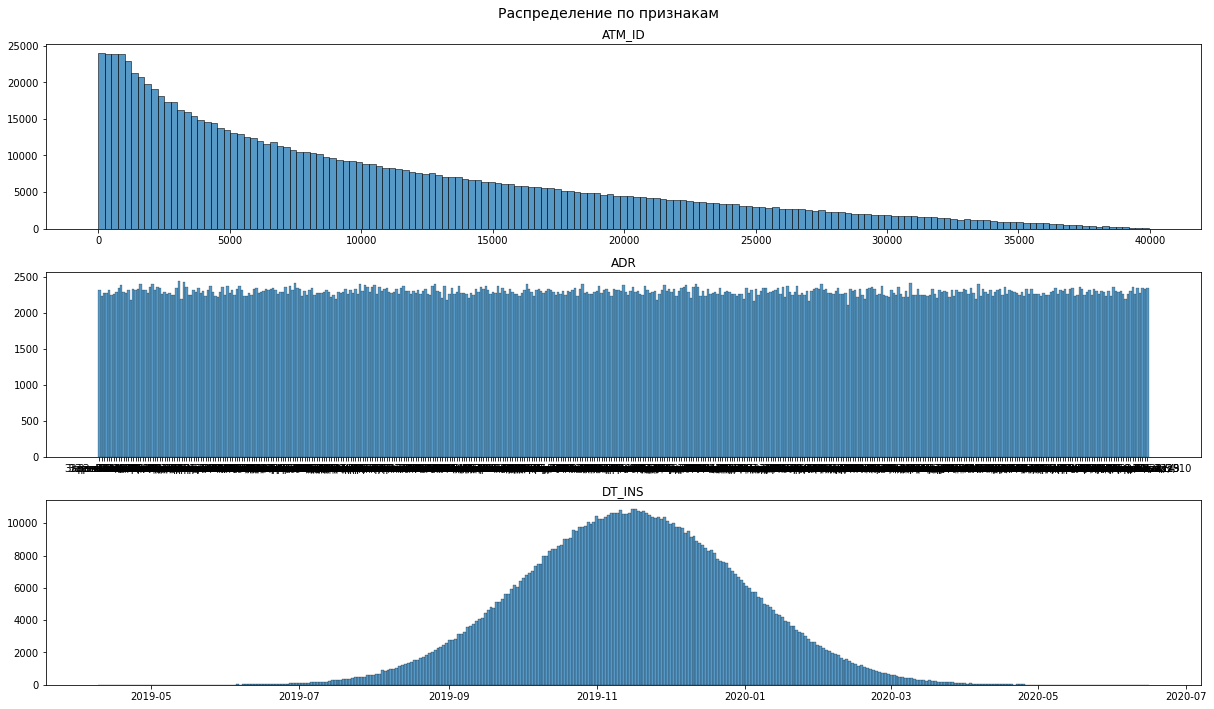

In [5]:
fig,ax = plt.subplots(3,1,figsize=(17,10))
plt.suptitle('Распределение по признакам', fontsize=14)
for i in range(len(data.columns)):
    ax[i] = sns.histplot(data=data, x=data.columns[i], ax=ax[i])
    ax[i].set_title(data.columns[i])
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
plt.tight_layout()
plt.show()

У первой тысячи id больше операций и выше вероятность генерации "некорректных" строк, чтобы были тройные и более повторы.

Сохраняем.

In [6]:
data.to_csv('task2_data.csv', sep=';')